In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Desktop/CAT/Data Science with Python/Datasets/Wine.csv')

In [3]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train = lda.fit_transform(X_train, Y_train)   #Basic diff in PCA & LDA; passing both x & y here.
X_test = lda.transform(X_test)

In [7]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [8]:
y_pred = classifier.predict(X_test)
y_pred = y_pred.reshape(len(y_pred), 1)
Y_test = Y_test.reshape(len(Y_test), 1)
print(np.concatenate((y_pred, Y_test), axis=1))

[[1 1]
 [3 3]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [3 3]
 [2 2]
 [2 2]
 [3 3]
 [3 3]
 [1 1]
 [2 2]
 [3 3]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [3 3]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]]


In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
print(cm)
acc = accuracy_score(Y_test, y_pred)
print(acc)

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
1.0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


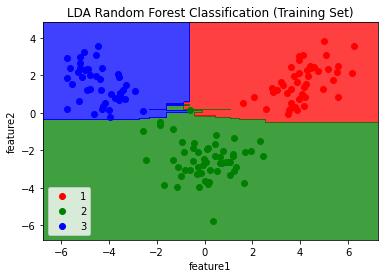

In [10]:
from matplotlib.colors import ListedColormap
x_set, y_set = X_train, Y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:,0].min() - 1, stop=x_set[:,0].max()+1, step=0.01),
                     np.arange(start=x_set[:,1].min()-1, stop=x_set[:,1].max()+1, step=0.01))

plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
                                                   alpha=0.75, cmap=ListedColormap(('red', 'green','blue')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(),x2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j ,0], x_set[y_set==j, 1], c=ListedColormap(('red', 'green','blue'))(i), label=j)
    
plt.title('LDA Random Forest Classification (Training Set)')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend()
plt.show()